## Testing the standard deviation of multiple clustering attempts of VGG16 latent space AT-TPC data

In [1]:
import numpy as np
#import tensorflow as tf
import sklearn as sk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
A = np.load("vgg_repr.npz")

In [3]:
for k in A.keys():
    print(k)

raw_data
filtered_data
filtered_targets
raw_targets


In [4]:
raw = A["raw_data"]
filt = A["filtered_data"]
raw_t = A["raw_targets"]
filt_t = A["filtered_targets"]

Just taking first 100 points for testing bc algo should be $N^2$

In [42]:
print(raw.shape)
raw_small = raw[:100]
print(raw_small.shape)

(51891, 8192)
(100, 8192)


In [43]:
N = 10
y = []
for i in range(N):
    y.append(KMeans(n_clusters=3, n_init=1).fit(raw_small))



(3, 8192)
(3, 8192)
0.02730237734880409
0.023283651422263102
0.03800537464783069


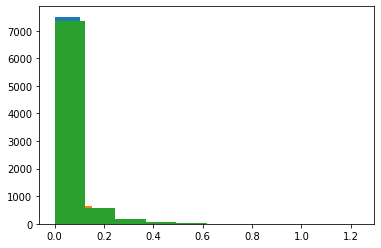

In [44]:
#print(y)

centers = []
for i in range(N):
    centers.append(y[i].cluster_centers_)
centers = np.array(centers)
center_means = np.mean(centers, axis=0)
center_std = np.std(centers, axis=0)

print(center_means.shape)
print(center_std.shape)

plt.hist(center_std[0])
plt.hist(center_std[1])
plt.hist(center_std[2])

print(sum(center_std[0])/len(center_std[0]))
print(sum(center_std[1])/len(center_std[1]))
print(sum(center_std[2])/len(center_std[2]))
#y1 = KMeans(n_clusters=3, n_init=1).fit(raw_small)
#y2 = KMeans(n_clusters=3, n_init=1).fit(raw_small)
#y3 = KMeans(n_clusters=3, n_init=1).fit(raw_small)

In [50]:
print(y[0].labels_)
print(y[1].labels_)
print(y[2].labels_)
print(y[0].labels_.shape)
print(np.sum(abs(y[0].labels_-y[1].labels_)))
print(np.sum(abs(y[1].labels_-y[2].labels_)))
#print(y.cluster_centers_)
print(sk.metrics.adjusted_rand_score(np.argmax(raw_t[:100], axis=1), y[0].labels_[:100]))
print(sk.metrics.adjusted_rand_score(np.argmax(raw_t[:100], axis=1), y[1].labels_[:100]))
print(sk.metrics.adjusted_rand_score(np.argmax(raw_t[:100], axis=1), y[2].labels_[:100]))


print(sk.metrics.accuracy_score(np.argmax(raw_t[:100], axis=1), y[0].labels_[:100]))
print(sk.metrics.accuracy_score(np.argmax(raw_t[:100], axis=1), y[1].labels_[:100]))
print(sk.metrics.accuracy_score(np.argmax(raw_t[:100], axis=1), y[2].labels_[:100]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 0 2 1 1 1 1 1 1 0 1 1 2 2 0 1 2 2 1 1 1
 2 0 2 2 1 1 1 0 0 0 1 2 2 1 1 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 2 2 1 1 2 2 2
 0 2 1 1 1 1 2 2 2 2 1 2 1 1 1 1 1 0 2 1 1 1 1 2 1 1]
[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 2 1 0 0 0 0 0 0 2 0 0 1 1 1 0 1 1 0 0 0
 1 2 1 1 0 0 0 2 2 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 2 1 0 0 0 0 1 0 0]
(100,)
40
106
0.0
0.0
0.0
0.93
0.55
0.39


In [47]:
#print(y1.cluster_centers_)
print(y[1].cluster_centers_)
print(y[2].cluster_centers_)

[[ 1.46856729e-01  0.00000000e+00  0.00000000e+00 ...  3.27548782e-02
   8.17138990e-01  0.00000000e+00]
 [ 1.31745275e-01  0.00000000e+00  0.00000000e+00 ...  1.22565979e-04
   7.60672009e-01  0.00000000e+00]
 [ 1.21800504e-01  0.00000000e+00  0.00000000e+00 ... -1.73472348e-18
   7.16895221e-01  0.00000000e+00]]
[[ 1.31745275e-01  0.00000000e+00  0.00000000e+00 ...  1.22565979e-04
   7.60672009e-01  0.00000000e+00]
 [ 1.21286502e-01  0.00000000e+00  0.00000000e+00 ... -1.73472348e-18
   7.15405712e-01  0.00000000e+00]
 [ 1.62725856e-01  0.00000000e+00  0.00000000e+00 ...  4.91323173e-02
   8.76942684e-01  0.00000000e+00]]


In [48]:
plt.hist(y.cluster_centers_[0])
#plt.hist(y.cluster_centers_[1])
#plt.hist(y.cluster_centers_[2])
y.inertia_

AttributeError: 'list' object has no attribute 'cluster_centers_'

In [27]:
y.score(raw_small)

-3529.250504864685

In [14]:
N = 10
y = []
for i in range(N):
    y.append(KMeans(n_clusters=3, n_init=1).fit(raw))




(3, 8192)
(3, 8192)
0.018839168639621755
0.019520313963913058
0.018263405632276315


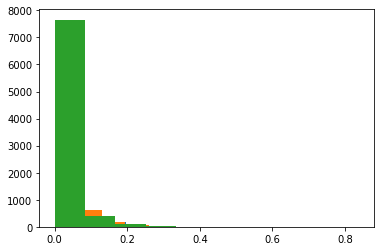

In [15]:
centers = []
for i in range(N):
    centers.append(y[i].cluster_centers_)
centers = np.array(centers)
center_means = np.mean(centers, axis=0)
center_std = np.std(centers, axis=0)

print(center_means.shape)
print(center_std.shape)

plt.hist(center_std[0])
plt.hist(center_std[1])
plt.hist(center_std[2])

print(sum(center_std[0])/len(center_std[0]))
print(sum(center_std[1])/len(center_std[1]))
print(sum(center_std[2])/len(center_std[2]))


In [55]:
np.set_printoptions(threshold=50)
print(y[0].labels_)
print(y[1].labels_)
print(y[2].labels_)

[1 1 1 ... 1 1 1]
[1 1 1 ... 2 1 1]
[0 0 0 ... 1 0 0]


In [36]:
print(sk.metrics.adjusted_rand_score(np.argmax(raw_t, axis=1), y[0].labels_[:1774]))
print(sk.metrics.adjusted_rand_score(np.argmax(raw_t, axis=1), y[1].labels_[:1774]))
print(sk.metrics.adjusted_rand_score(np.argmax(raw_t, axis=1), y[2].labels_[:1774]))
#print(len(raw_t))
#print(len(raw))

-0.00541606762316851
-0.00541606762316851
-0.00541606762316851


WTF is with ARI?

In [54]:
pred = [1,1,1,2,3,3,3,2] 
true = [1,1,2,2,3,3,3,2]

pred2 = [1,1,2,2,2,3,3,2] 
true2 = [1,1,2,2,3,3,3,2]
print(sk.metrics.adjusted_rand_score(true, pred))
print(sk.metrics.adjusted_rand_score(true2, pred2))

0.6190476190476191
0.5454545454545454
